
# Generacion de Dataset


Descargar el dataset **Facebook comment volume** https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset. 




# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


# Cargar datos
Cargar los datos de entrenamiento.

In [4]:
PATH_EXPERIMENT = "./archive/2nd_test/2nd_test/"
PATH_DATASET = "./Dataset/dataset_2.csv"

from fileinput import filename
import os
from os.path import isfile, join
from matplotlib.pyplot import axis

# onlyfiles = [f for f in listdir(PATH_EXPERIMENT) if isfile(join(PATH_EXPERIMENT, f))]
features = ['mean', 'std', 'iqr']
n_bearings = 4
df_columns = []
# Create list of feature names
for j in range(n_bearings):
    for i in features:
        df_columns.append(i+'_'+str(j))
print(df_columns)

def GetIQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    iqr = q3 - q1
    return np.array(iqr).flatten().reshape(1,4)

def GetFundFreq(df):
    fft = np.fft.rfft(np.array(df), axis=0)
    print(fft)
    

def AddNewRow(df_out, df_in):
    # Get per bearing values
    f_vals = np.array(df_in.mean(axis=0)).reshape(1,4)  # mean
    f_vals = np.vstack((f_vals, np.array(df_in.std(axis=0)).reshape(1,4)))  # std
    f_vals = np.vstack((f_vals, GetIQR(df_in))) # irq
    GetFundFreq(df_in)

    new_row = pd.DataFrame(f_vals.flatten(order='F').reshape(1,len(df_columns)),columns=df_columns)

    # Get 

    df_out = pd.concat([df_out, new_row], axis=0)
    
    return df_out
    


files_to_process = 1 # if -1, process all files in path folder

file_names = [x for x in os.listdir(PATH_EXPERIMENT) if x.endswith('.39')]
df_in = None
df_out = pd.DataFrame(columns=df_columns)#, 'std_0', 'std_1', 'std_2', 'std_3'])
if(files_to_process == -1):
    files_to_process = len(file_names)

for i in range(files_to_process):
    pathText = PATH_EXPERIMENT + '\\' + file_names[i]
    df_in = pd.read_csv(pathText, delimiter='\t', header=None)
    df_out = AddNewRow(df_out, df_in)

df_out=df_out.reset_index(inplace=False, drop=True)
print(df_out.head())
print("shape:",df_out.shape)



# Forma de nuestro dataset:
# #sample | mean_0 | std_0 | .... | mean_1 | std_1 | ..... | mean_4 | std_4 | ... ||| failure_0 | failure_1 | ... | failure_3
                                                                #                       None    | outer_race| ... | None


['mean_0', 'std_0', 'iqr_0', 'mean_1', 'std_1', 'iqr_1', 'mean_2', 'std_2', 'iqr_2', 'mean_3', 'std_3', 'iqr_3']
[[-208.814      +0.j         -259.993      +0.j
  -297.799      +0.j         -205.332      +0.j        ]
 [   1.23696458 -2.53466328j   -7.46021637 +5.82154225j
    -8.18700165 +4.19932413j    3.13946248-10.79573425j]
 [  -0.32628086 -8.22161681j   -3.55888458 +8.37349169j
    -5.54959953 -0.47144393j   -1.50069675 -0.63701431j]
 ...
 [  -1.44058915 -0.85873301j    1.09319565 +2.7409095j
    -5.76218541 -6.261228j      2.0344863  +0.24905304j]
 [  -0.35241025 +1.34234513j   -4.13157978 +1.72726949j
    -0.86898471 -4.8821911j     2.22907032 -3.11015463j]
 [  -0.928      +0.j           -1.141      +0.j
    19.865      +0.j           -0.67       +0.j        ]]
     mean_0     std_0  iqr_0    mean_1     std_1  iqr_1    mean_2     std_2  \
0 -0.010196  0.073477  0.096 -0.012695  0.090056  0.119 -0.014541  0.108436   

   iqr_2    mean_3     std_3  iqr_3  
0  0.132 -0.010026  0.0

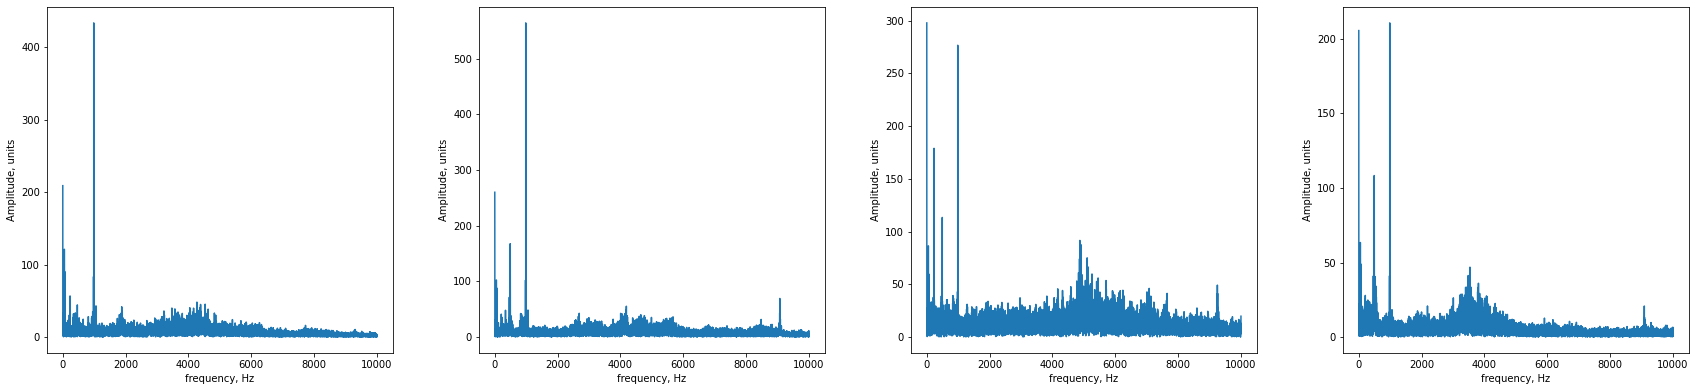

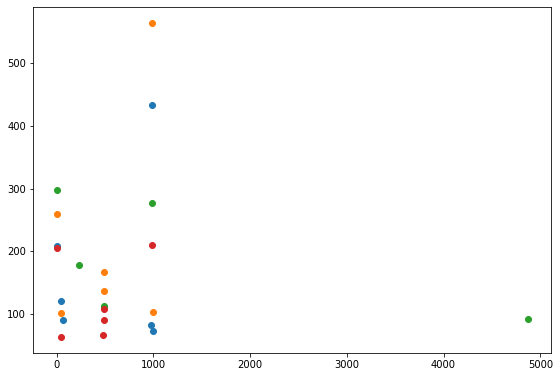

In [64]:

def GetFundFreq(df, Fs):
    signal = np.array(df)
    fft_abs = np.abs(np.fft.rfft(signal, axis=0))
    freq = np.fft.rfftfreq(signal.shape[0], d=1/Fs)
    i = 1
    harmonics_to_get = 6
    harmonics = []
    fig = plt.figure()
    fig2 = plt.figure()
    axes_top = fig2.add_axes([0, 0, 1.2, 1.2])
    for column in fft_abs.T:
        axes = fig.add_axes([i, 0, 0.8, 1.2])
        axes.set_xlabel("frequency, Hz")
        axes.set_ylabel("Amplitude, units")
        axes.plot(freq, column)
        i+=1
        # Get top N frequencies
        harmonics.append(sorted(zip(column, freq), reverse=True)[:harmonics_to_get])
        one = np.asarray(harmonics[-1]).T
        axes_top.scatter(one[:][1], one[:][0] )
    plt.show()
    # print(harmonics)
    # one = np.asarray(harmonics[0]).T
    # two = np.asarray(harmonics[1]).T
    # fig = plt.figure()
    # axes = fig.add_axes([0, 0, 1.2, 1.2])
    # axes.scatter(one[:][1], one[:][0] )
    # axes.scatter(two[:][1], two[:][0] )
    

GetFundFreq(df_in, 20000)

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario. 

### Análisis exploratorio

In [164]:
# Explore the datset
print('#NaN: ' + str(np.count_nonzero(np.isnan(X))))    # No values are NaN
print('Shape:' + str(X.shape))
print('Features: 53')

print('X:' + str(X.shape))
print('Y:' + str(Y.shape))

df.describe(include= 'all')

#NaN: 0
Shape:(199030, 54)
Features: 53
X:(199030, 54)
Y:(199030,)


,Page Popularity Likes†,Page Checkins†,Page Talking About†,Page Category†,CC1 Min,CC1 Max,CC1 Avg,CC1 Median,CC1 Std,CC2 Min,...,Post Published Weekday 45,Post Published Weekday 46,Base DateTime Weekday 47,Base DateTime Weekday 48,Base DateTime Weekday 49,Base DateTime Weekday 50,Base DateTime Weekday 51,Base DateTime Weekday 52,Base DateTime Weekday† 53,Target Variable†
count,1.990300e+05,199030.000000,1.990300e+05,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,...,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.00000,199030.000000
mean,1.313785e+06,4674.517731,4.477173e+04,24.242074,0.470256,485.317656,55.901120,35.263538,68.090731,0.068135,...,0.146209,0.136954,0.139391,0.134829,0.136788,0.147088,0.155298,0.144245,0.14236,7.168708
std,6.771131e+06,20573.440641,1.108983e+05,19.935334,13.178067,538.194418,86.515496,68.162671,82.411057,2.172591,...,0.353317,0.343800,0.346355,0.341542,0.343625,0.354195,0.362190,0.351338,0.34942,34.298193
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,49.000000,5.494737,2.000000,8.033255,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.929110e+05,0.000000,7.237000e+03,18.000000,0.000000,256.000000,23.647407,12.000000,35.022296,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,784.000000,70.931961,41.000000,104.152684,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,1458.000000,2495.000000,2031.000000,2123.000000,762.357746,227.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1702.000000


Text(0, 0.5, 'H Local')

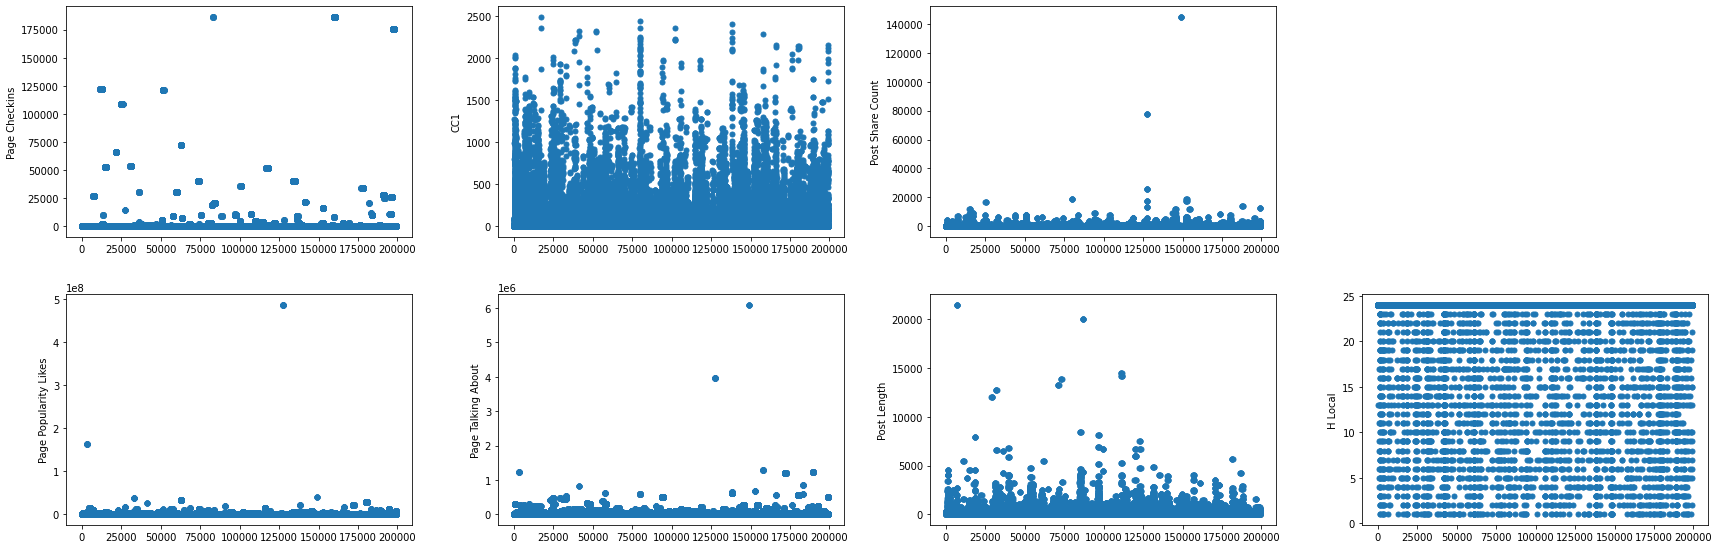

In [116]:
# Plot some individual features first to get measure of distributions and order of magnitude
fig = plt.figure()

axes1 = fig.add_axes([0, 0, 0.8, 0.8])
feature = 'Page Popularity Likes'
axes1.plot(range(0, X.shape[0]), X[:,feature_dict[feature]], marker='o', markersize=5, lw= 0)
axes1.set_ylabel(feature)

axes2 = fig.add_axes([0, 1, 0.8, 0.8])
feature = 'Page Checkins'
axes2.plot(range(0, X.shape[0]), X[:,feature_dict[feature]], marker='o', markersize=5, lw= 0)
axes2.set_ylabel(feature)

axes3 = fig.add_axes([1, 0, 0.8, 0.8])
feature = 'Page Talking About'
axes3.plot(range(0, X.shape[0]), X[:,feature_dict[feature]], marker='o', markersize=5, lw= 0)
axes3.set_ylabel(feature)

axes4 = fig.add_axes([1, 1, 0.8, 0.8])
feature = 'CC1'
axes4.plot(range(0, X.shape[0]), X[:,feature_dict[feature]], marker='o', markersize=5, lw= 0)
axes4.set_ylabel(feature)

axes5 = fig.add_axes([2, 0, 0.8, 0.8])
feature = 'Post Length'
axes5.plot(range(0, X.shape[0]), X[:,feature_dict[feature]], marker='o', markersize=5, lw= 0)
axes5.set_ylabel(feature)

axes6 = fig.add_axes([2, 1, 0.8, 0.8])
feature = 'Post Share Count'
axes6.plot(range(0, X.shape[0]), X[:,feature_dict[feature]], marker='o', markersize=5, lw= 0)
axes6.set_ylabel(feature)

axes7 = fig.add_axes([3, 0, 0.8, 0.8])
feature = 'H Local'
axes7.plot(range(0, X.shape[0]), X[:,feature_dict[feature]], marker='o', markersize=5, lw= 0)
axes7.set_ylabel(feature)

#### Identify correlations

Text(0, 0.5, 'Target Variable')

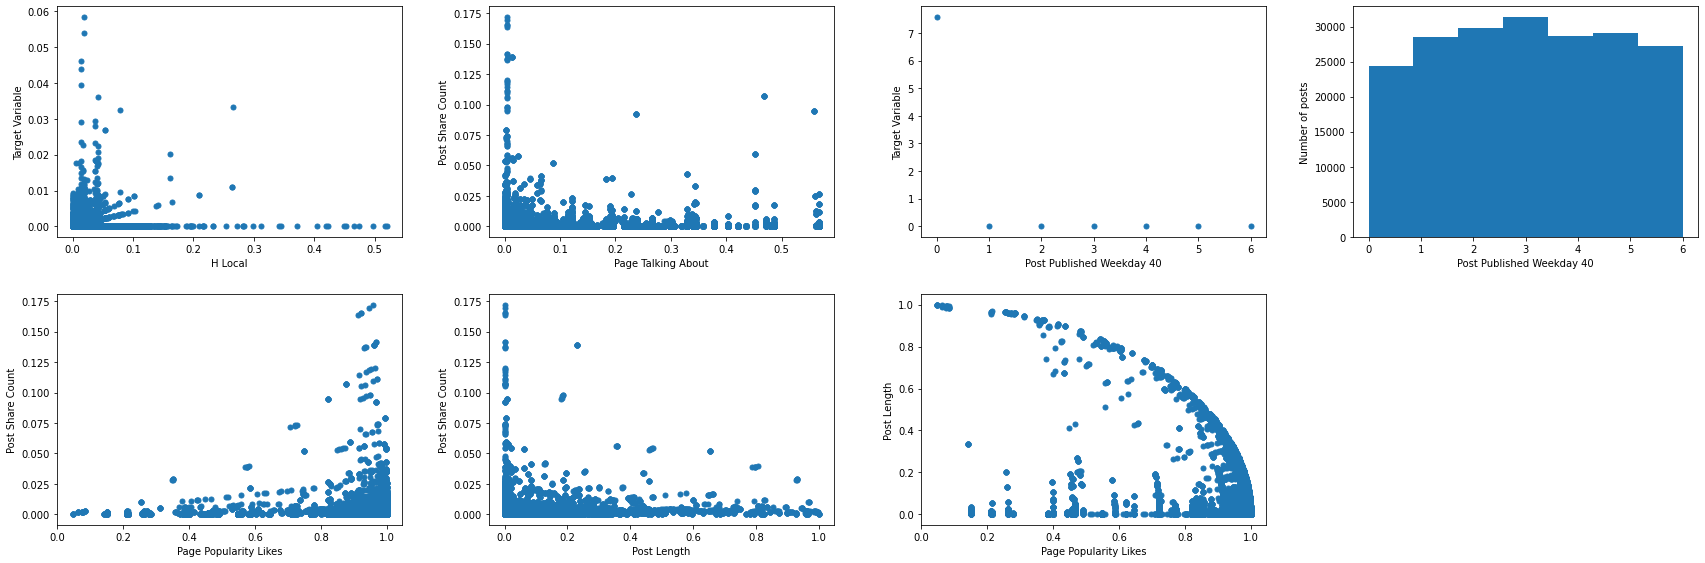

In [167]:
# Normalize and try to see whether there is correlation between the features

day_to_name = {'sunday': 0, 'monday': 1, 'tuesday': 2, 'wednesday': 3, 'thursday': 4, 'friday': 5, 'saturday': 6}
# Receives array of 7 bits and returns a number from 0 to 6 indicating the weekday (0=sunday ... 6=saturday (input=1000000))
def DecodeWeekday(arr):
    for i, v in enumerate(arr):
        if(v == 1):
            return i

# Receives an n x 7 matrix of data and returns an n x 1 array with the weekday according to DecodeWeekday function
def MatrixToWeekday(data):
    samples = data.shape[0]
    w = np.zeros(samples)
    for i in range(samples):
        w[i] = DecodeWeekday(data[i,:])
    return w

X_norm = preprocessing.normalize(X[:,:], axis=1)  ## Normalize with respect to columns in order to compare samples and draw some conclusions
fig = plt.figure()

axes1 = fig.add_axes([0, 1, 0.8, 0.8])
x_feature = 'H Local'
y_feature = 'Target Variable'
axes1.plot(X_norm[:,feature_dict[x_feature]], X_norm[:,feature_dict[y_feature]], marker='o', markersize=5, lw= 0)
axes1.set_xlabel(x_feature)
axes1.set_ylabel(y_feature)
# Conclusion: The n° of comments increases with time. Also, posts with few comments either increase early and rocket-shot or stay at low comment count

axes2 = fig.add_axes([0, 0, 0.8, 0.8])
x_feature = 'Page Popularity Likes'
y_feature = 'Post Share Count'
axes2.plot(X_norm[:,feature_dict[x_feature]], X_norm[:,feature_dict[y_feature]], marker='o', markersize=5, lw= 0)
axes2.set_xlabel(x_feature)
axes2.set_ylabel(y_feature)
# Conclusion: More popular pages get more shares of posts

axes3 = fig.add_axes([1, 1, 0.8, 0.8])
x_feature = 'Page Talking About'
y_feature = 'Post Share Count'
axes3.plot(X_norm[:,feature_dict[x_feature]], X_norm[:,feature_dict[y_feature]], marker='o', markersize=5, lw= 0)
axes3.set_xlabel(x_feature)
axes3.set_ylabel(y_feature)
# Conclusion: No strong correlation can be seen

axes4 = fig.add_axes([1, 0, 0.8, 0.8])
x_feature = 'Post Length'
y_feature = 'Post Share Count'
axes4.plot(X_norm[:,feature_dict[x_feature]], X_norm[:,feature_dict[y_feature]], marker='o', markersize=5, lw= 0)
axes4.set_xlabel(x_feature)
axes4.set_ylabel(y_feature)
# Conclusion: Short posts are shared more

axes5 = fig.add_axes([2, 0, 0.8, 0.8])
x_feature = 'Page Popularity Likes'
y_feature = 'Post Length'
axes5.plot(X_norm[:,feature_dict[x_feature]], X_norm[:,feature_dict[y_feature]], marker='o', markersize=5, lw= 0)
axes5.set_xlabel(x_feature)
axes5.set_ylabel(y_feature)
# Conclusion: Popular pages make short posts

axes6 = fig.add_axes([3, 1, 0.8, 0.8])
x_feature = 'Post Published Weekday 40'
y_feature = 'Number of posts'
day_post_published = MatrixToWeekday(X[:,feature_dict[x_feature]:feature_dict[x_feature]+7])    # Conclusion: Get the day on which each post was published
a = axes6.hist(day_post_published, bins=7)
axes6.set_xlabel(x_feature)
axes6.set_ylabel(y_feature)
# Conclusion: The dataset is balanced throughout the weekdays

axes7 = fig.add_axes([2, 1, 0.8, 0.8])
x_feature = 'Post Published Weekday 40'
y_feature = 'Target Variable'
day_post_published = MatrixToWeekday(X[:,feature_dict[x_feature]:feature_dict[x_feature]+7])    # Conclusion: Get the day on which each post was published
# Now sum the n° of comments from each day
weekdays = np.unique(day_post_published)    
y_val = np.zeros(len(weekdays))
for i, val in enumerate(weekdays):
    y_val[i] = np.sum( X_norm[ X_norm[:,feature_dict[x_feature]] == val , feature_dict[y_feature] ] )

axes7.plot(np.unique(day_post_published), y_val, marker='o', markersize=5, lw= 0)
axes7.set_xlabel(x_feature)
axes7.set_ylabel(y_feature)
# Conclusion: Strong correlation between posts with highest comment count and sundays. Specially considering that sunday has the least amount of posts...

### Preprocessing

In [168]:
dims_to_del = set([53]) # Set. Delete the output from the data for processing later
# Check variance of features 
desc = df.describe(include= 'all').to_numpy()
# Check dimensions that have std==0 -> No information. Can eliminate
dims_to_del.update(i[0] for i in np.argwhere(desc[2,:]==0)) # dims_to_del holds the dimensions that could be removed
print(dims_to_del)

{37, 53}


c:\Users\mdevo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\mdevo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Dims to delete for 0.8 threshold: {4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 29, 37, 53}


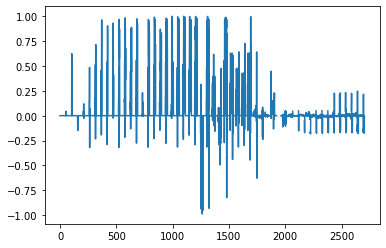

In [193]:
# Compute Pearson Correlation 
pearson = np.corrcoef(X[:,:52], rowvar=False)   # Compute correlation between features (without the output). Some errors occur due to std of Post Promotion Status feature is 0. Ignore.
fig = plt.figure()
pearson_tril = np.tril(pearson, k=-1)   # Keep the lower triangle
plt.plot(pearson_tril.flatten())        # Plot for visualizing

# delete 1 of the dimensions associated with a pearson coef close to 1
threshold = 0.8
indices = np.where(abs(pearson_tril) >= threshold)
dims_to_del.update(indices[1])  # Add the dimensions that correspond to a pearson coef greater than the threshold
print('Dims to delete for ' + str(threshold) + ' threshold: ' + str(dims_to_del))

# Prediction
Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [175]:
# Reduce dataset based on Pearson coef
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_red_pearson = np.delete(X, list(dims_to_del), 1)
print(X_red_pearson.shape)

(199030, 31)


Dimensions reduced via PCA to 2


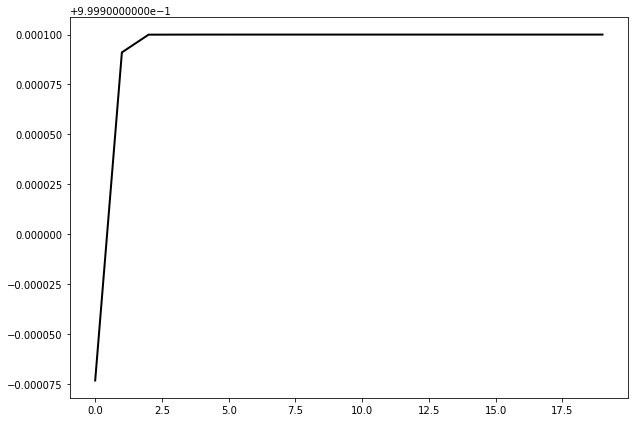

In [196]:
# Reduce dimension based on PCA
from sklearn.decomposition import PCA
X_no_y = np.delete(X, -1, axis=1) # Remove output column 
pca = PCA(n_components=20).fit(X_no_y)
X_red_pca = pca.transform(X_no_y)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
# Most of the variance is accumulated in the two dimensions. Keep only that

pca = PCA(n_components=2).fit(X_no_y)
X_red_pca = pca.transform(X_no_y)
print('Dimensions reduced via PCA to ' + str(X_red_pca.shape[1]))

### Linear Regression

Train: (159224, 31)(159224,)
Test: (39806, 31)(39806,)
Mean Absolute Error: 7.989158450647847
Mean Squared Error: 792.5431432067694
RMS: 28.1521427817985


Text(0, 0.5, 'Error (%)')

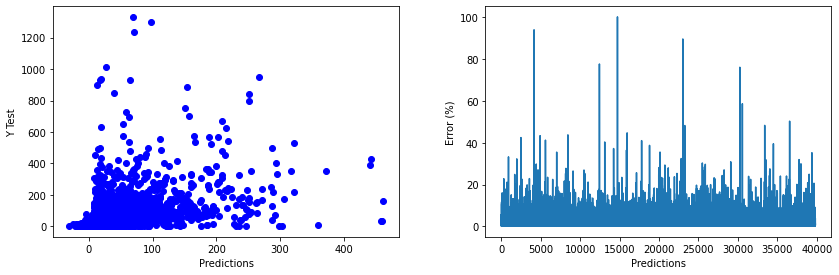

In [222]:
# Linear Regression with Pearson dataset
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

X_train_pearson, X_test_pearson, Y_train_pearson, Y_test_pearson = train_test_split(X_red_pearson, Y, test_size=0.2, random_state=12)  ## Split X without the last column (Target Variable)
print('Train: ' + str(X_train_pearson.shape) + str(Y_train_pearson.shape))
print('Test: ' + str(X_test_pearson.shape) + str(Y_test_pearson.shape))

lin_pearson = LinearRegression()

lin_pearson.fit(X_train_pearson,Y_train_pearson)
# Make predictions
pred = lin_pearson.predict(X_test_pearson)

# Plot predictions vs. y_test
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.8, 0.8])

ax.set_xlabel("Predictions")
ax.set_ylabel("Y Test")
ax.plot(pred, Y_test_pearson,'bo')

print('Mean Absolute Error:', mean_absolute_error(Y_test_pearson, pred))
print('Mean Squared Error:',mean_squared_error(Y_test_pearson, pred))
print('RMS:', np.sqrt(mean_squared_error(Y_test_pearson, pred)))

ax1 = fig.add_axes([1, 0, 0.8, 0.8])
error = abs(pred - Y_test_pearson)
for i, val in enumerate(error):
    error[i] = ((val / Y_test_pearson[i]) if Y_test_pearson[i] != 0 else 1)
ax1.plot(error)
ax1.set_xlabel("Predictions")
ax1.set_ylabel("Error (%)")

Train: (159224, 2)(159224,)
Test: (39806, 2)(39806,)
[3.22805861e-07 7.99157022e-05]
Mean Absolute Error: 9.966033507166678
Mean Squared Error: 1112.5072469541492
RMS: 33.35426879657459


Text(0, 0.5, 'Error (%)')

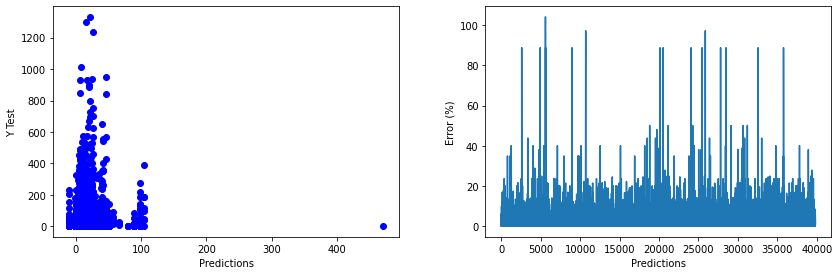

In [223]:
# Linear Regression with PCA dataset

X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_red_pca, Y, test_size=0.2, random_state=12)  ## Split X without the last column (Target Variable)
print('Train: ' + str(X_train_pca.shape) + str(Y_train_pca.shape))
print('Test: ' + str(X_test_pca.shape) + str(Y_test_pca.shape))
lin = LinearRegression()

lin.fit(X_train_pca,Y_train_pca)
print(lin.coef_)
# Make predictions
pred = lin.predict(X_test_pca)

# Plot predections vs. y_test!
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.8, 0.8])

ax.set_xlabel("Predictions")
ax.set_ylabel("Y Test")
ax.plot(pred, Y_test_pca,'bo')

print('Mean Absolute Error:', mean_absolute_error(Y_test_pca, pred))
print('Mean Squared Error:',mean_squared_error(Y_test_pca, pred))
print('RMS:', np.sqrt(mean_squared_error(Y_test_pca, pred)))

ax1 = fig.add_axes([1, 0, 0.8, 0.8])
error = abs(pred - Y_test_pca)
for i, val in enumerate(error):
    error[i] = ((val / Y_test_pca[i]) if Y_test_pca[i] != 0 else 1)
ax1.plot(error)
ax1.set_xlabel("Predictions")
ax1.set_ylabel("Error (%)")

# Conclusion: PCA does not improve the predictions

Mean Absolute Error: 7.972492947491882
Mean Squared Error: 793.2741133618656
RMS: 28.16512228558338


Text(0, 0.5, 'Error (%)')

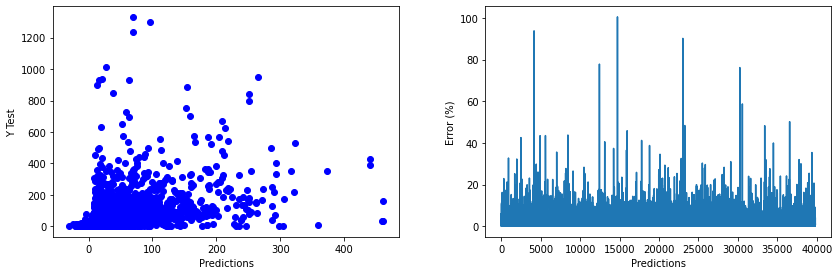

In [225]:
# Lasso model with Pearson dataset
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1).fit(X_train_pearson, Y_train_pearson)

pred = clf.predict(X_test_pearson)

# Plot predictions vs. y_test
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.8, 0.8])

ax.set_xlabel("Predictions")
ax.set_ylabel("Y Test")
ax.plot(pred, Y_test_pearson,'bo')

print('Mean Absolute Error:', mean_absolute_error(Y_test_pearson, pred))
print('Mean Squared Error:',mean_squared_error(Y_test_pearson, pred))
print('RMS:', np.sqrt(mean_squared_error(Y_test_pearson, pred)))

ax1 = fig.add_axes([1, 0, 0.8, 0.8])
error = abs(pred - Y_test_pearson)
for i, val in enumerate(error):
    error[i] = ((val / Y_test_pearson[i]) if Y_test_pearson[i] != 0 else 1)
ax1.plot(error)
ax1.set_xlabel("Predictions")
ax1.set_ylabel("Error (%)")


## Conclusiones


En primer lugar, se hizo un análisis exploratorio para entender el dataset y ver las magnitudes que se manejaban. Luego, se intentaron ver correlaciones entre las distintas variables y se obtuvieron fuertes conclusiones respecto a la correlación de features. 

##### <u> Reducción de dimensionalidad</u>
Luego se probaron distintos enfoques para reducir la dimensionalidad de los datos y poder entrenar un modelo que sea capaz de predecir la variable objetivo.
Para reducir dimensionalidad, se tomaron dos caminos:
1) A partir de la matriz de correlación de Pearson, se obtuvo la correlación entre los distintos features del dataset. Se observaron que varias correlación se asemejaban a 1 o -1, lo que indicaría una correlación lineal. Luego, a partir de un threshold seleccionable, se quitan una de las dos dimensiones que tienen alta correlación. En nuestro caso, se fijo el threshold en 0.8 y se removieron 22 dimensiones.
2) Se utilizó PCA para reducir la dimensionalidad del dataset. Con PCA se concluyó que se puede comprimir el 90% de la varianza en 1 sola dimension. Luego, se tomaron 2 dimensiones para sumar el 99% de la varianza.

##### <u> Predicciones </u>
Se utilizó regresión lineal para intentar predecir los comentarios de un post. El modelo se entrenó con los dos dataset mencionados anteriormente y se obtuvo un error considerable. La reducción con la matriz de correlación de Pearson devolvió mejores resultados que con PCA, aunque ninguno de los dos modelos presentó resultados favorables.
Por último, se intentó entrenar un modelo utilizando un regularizador Lasso, para el cuál se utilizó el dataset de Pearson que obtuvo mejores resultados que PCA. Los resultados obtenidos son similares a los anteriores para el dataset Pearson, por lo que no se obtuvieron ventajas regularizando el dataset.